In [302]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Audio

fp = pd.read_csv('kaggle-data/train_fp.csv')
tp = pd.read_csv('kaggle-data/train_tp.csv')

In [303]:
species_names = ['elgr', 'elbr', 'leal', 'elco', 'elhe', 'sean', 'mepo', 'cofl', 'ello', 'nees', 'lopo', 'vial', 'elpo', 'menu', 'elri', 'pasq', 'elan', 'tupl', 'elun', 'covi', 'tome', 'elwi', 'nesp', 'sppo']

In [304]:
[i for i in range(len(species_names)) if species_names[i] == 'vial']

[11]

In [305]:
def hz_to_pixel(hz):
    x = librosa.hz_to_mel(hz) - librosa.hz_to_mel(150)
    top = librosa.hz_to_mel(11025) - librosa.hz_to_mel(150)
    return 79 * x / top

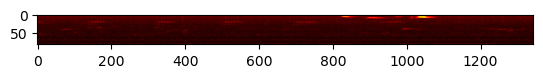

In [306]:
# spindalis portoricensis
row = tp[tp.species_id == 23].iloc[7]
rec_id = row.recording_id
smin = int(row.t_min * 22050)
smax = int(row.t_max * 22050)

sig, sr = librosa.load('kaggle-data/train/%s.flac' % rec_id)
spectrum = librosa.feature.melspectrogram(
    y=sig[smin:smax], sr=sr, fmin=150, n_fft=512, 
    hop_length=130, n_mels=80, norm=100.0, power=0.6)

plt.imshow(spectrum[::-1,:], cmap = 'hot', vmin = 0, vmax = 4)

In [307]:
Audio(sig[smin:smax], rate = 22050)

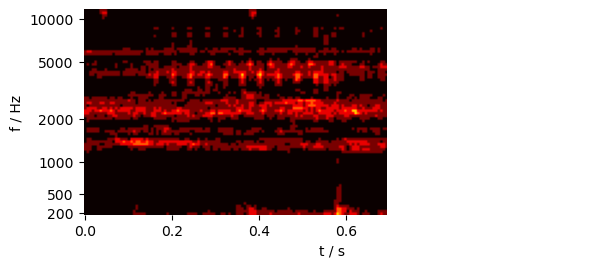

In [368]:
from matplotlib.patches import Rectangle

# eleutherodactylus unicolor
row = tp[tp.species_id == 18].iloc[10]
rec_id = row.recording_id
smin = int(row.t_min * 22050)
smax = int(row.t_max * 22050)

sig, sr = librosa.load('kaggle-data/train/%s.flac' % rec_id)
spectrum = librosa.feature.melspectrogram(
    y=sig[smin:smax], sr=sr, fmin=150, n_fft=512, 
    hop_length=130, n_mels=80, norm=100.0, power=0.6)

image = np.full((80,193), 1000)
image[:,:118] = spectrum[::-1,:]
plt.imshow(image, cmap = 'hot', vmin = 0, vmax = 6)
plt.xticks(
    ticks = [i*0.2*22050/130 for i in range(4)],
    labels = ['%.1f' % (i*0.2) for i in range(4)]
)
plt.yticks(
    ticks = [80-hz_to_pixel(x) for x in [200,500,1000,2000,5000,10000]],
    labels = ['200','500','1000','2000','5000','10000']
)
plt.xlabel('t / s')
plt.ylabel('f / Hz')
plt.box(False)
plt.savefig('elun.png', bbox_inches='tight', pad_inches = 0.0, transparent=True, dpi=400)
plt.show()
Audio(sig[smin:smax], rate = 22050)

In [333]:
#added by Gautam
import soundfile

#window = 200
sig1 = sig[smin:smax]
#post_sig = np.asarray([(sum(sig1[y:y+window])/window) for y in range(len(sig1)-window)])
#Audio(post_sig,rate = 22050)
soundfile.write('/home/birdsong/eleutherodactylus_unicolor.wav', sig1, sr)

(80, 193)


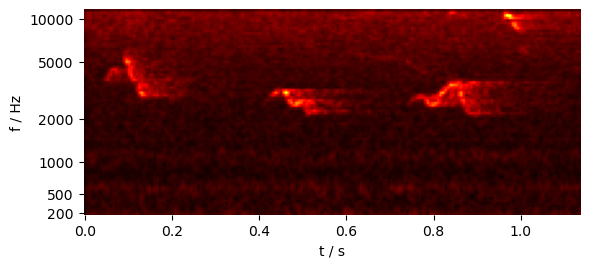

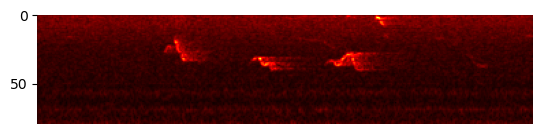

25088


In [363]:
# black whiskered vireo
row = tp[tp.species_id == 11].iloc[6]
rec_id = row.recording_id
smin = int(row.t_min * 22050)
smax = int(row.t_max * 22050)

sig, sr = librosa.load('kaggle-data/train/%s.flac' % rec_id)
spectrum = librosa.feature.melspectrogram(
    y=sig[smin:smax], sr=sr, fmin=150, n_fft=512, 
    hop_length=130, n_mels=80, norm=100.0, power=0.6)

print(spectrum.shape)

plt.imshow(spectrum[::-1,:], cmap = 'hot', vmin = 0, vmax = 6)
plt.xticks(
    ticks = [i*0.2*22050/130 for i in range(6)],
    labels = ['%.1f' % (i*0.2) for i in range(6)]
)
plt.yticks(
    ticks = [80-hz_to_pixel(x) for x in [200,500,1000,2000,5000,10000]],
    labels = ['200','500','1000','2000','5000','10000']
)
plt.xlabel('t / s')
plt.ylabel('f / Hz')
plt.box(False)
plt.savefig('vial.png', bbox_inches='tight', pad_inches=0.0, transparent=True, dpi=400)
plt.show()

spectrum = librosa.feature.melspectrogram(
    y=sig[smin-5*2205:smax+5*2205], sr=sr, fmin=150, n_fft=512, 
    hop_length=130, n_mels=80, norm=100.0, power=0.6)

plt.imshow(spectrum[::-1,:], 
    cmap = 'hot', vmin = 0, vmax = 6)
plt.xticks([])
plt.xticks([])
plt.box(False)
plt.savefig('vial_context.png', bbox_inches='tight', pad_inches=0.0, transparent=True, dpi=400)
plt.show()

print(smax - smin)
Audio(sig[smin:smax], rate = 22050)

In [336]:
#added by Gautam
import soundfile

#window = 200
sig1 = sig[smin:smax]
#post_sig = np.asarray([(sum(sig1[y:y+window])/window) for y in range(len(sig1)-window)])
#Audio(post_sig,rate = 22050)
soundfile.write('/home/birdsong/black_whiskered_vireo.wav', sig1, sr)


In [94]:
birdclef_metadata = pd.read_csv('BirdCLEF/train_metadata.csv')

bubwar2


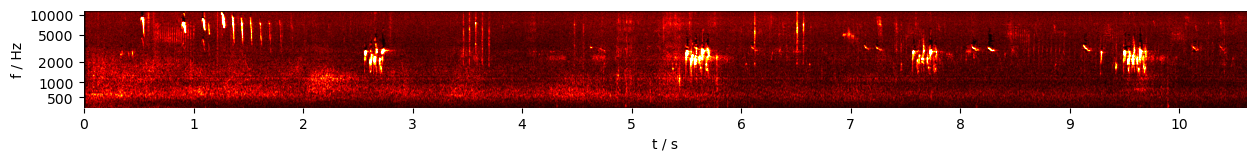

In [383]:
species = sorted(os.listdir('BirdCLEF/train_audio'))[57]
filename = sorted(os.listdir('BirdCLEF/train_audio/%s' % species))[1]
sig, _ = librosa.load('BirdCLEF/train_audio/%s/%s' % (species, filename))
spectrum = librosa.feature.melspectrogram(
    y=sig, sr=22050, fmin=150, n_fft=1024, 
    hop_length=384, n_mels=150, norm=100.0, power=0.7)

print(species)

#for i in range(spectrum.shape[1]//509):
#    plt.yticks([])
#    plt.xticks([])
#    plt.imshow(spectrum[::-1,i*600:(i+1)*600], cmap = 'hot', vmin = 0, vmax = 5)
#    plt.show()

def hz_to_pixel(hz):
    x = librosa.hz_to_mel(hz) - librosa.hz_to_mel(150)
    top = librosa.hz_to_mel(11025) - librosa.hz_to_mel(150)
    return 149 * x / top

plt.figure(figsize = (15, 2))
plt.imshow(spectrum[::-1,:1800], cmap = 'hot', vmin = 0, vmax = 5)
plt.xticks(
    ticks = [i*22050/130 for i in range(11)],
    labels = ['%.0f' % i for i in range(11)]
)
plt.yticks(
    ticks = [150-hz_to_pixel(x) for x in [500,1000,2000,5000,10000]],
    labels = ['500','1000','2000','5000','10000']
)
plt.xlabel('t / s')
plt.ylabel('f / Hz')
plt.box(False)

plt.savefig('longspectrum.png', bbox_inches='tight', pad_inches=0.0, transparent=True, dpi=400)
plt.show()

bubwar2


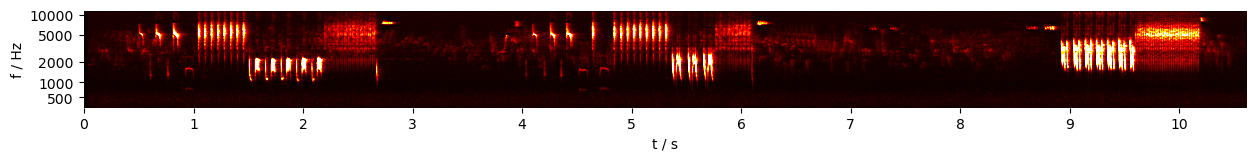

In [385]:
sig, _ = librosa.load('BirdCLEF/train_audio/thrnig1/XC110336.ogg')
spectrum = librosa.feature.melspectrogram(
    y=sig, sr=22050, fmin=150, n_fft=1024, 
    hop_length=384, n_mels=150, norm=100.0, power=0.7)

print(species)

#for i in range(spectrum.shape[1]//509):
#    plt.yticks([])
#    plt.xticks([])
#    plt.imshow(spectrum[::-1,i*600:(i+1)*600], cmap = 'hot', vmin = 0, vmax = 5)
#    plt.show()

def hz_to_pixel(hz):
    x = librosa.hz_to_mel(hz) - librosa.hz_to_mel(150)
    top = librosa.hz_to_mel(11025) - librosa.hz_to_mel(150)
    return 149 * x / top

plt.figure(figsize = (15, 2))
plt.imshow(spectrum[::-1,:1800], cmap = 'hot', vmin = 0, vmax = 5)
plt.xticks(
    ticks = [i*22050/130 for i in range(11)],
    labels = ['%.0f' % i for i in range(11)]
)
plt.yticks(
    ticks = [150-hz_to_pixel(x) for x in [500,1000,2000,5000,10000]],
    labels = ['500','1000','2000','5000','10000']
)
plt.xlabel('t / s')
plt.ylabel('f / Hz')
plt.box(False)

plt.savefig('longspectrum2.png', bbox_inches='tight', pad_inches=0.0, transparent=True, dpi=400)
plt.show()